In [2]:
from Halite import *

/home/fefe/Thesi/all_you_need/geant/Halite.py:186: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Num[i] += quad(func, E[i], E[i+1], epsrel=1e-8)[0]*time*arr_time[j] #quad per integrare la funzione di flusso nell'intervallo, moltiplica per il tempo e accumula i risultati in Num
/home/fefe/Thesi/all_you_need/geant/Halite.py:193: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Num[i+8] += quad(func, E[i], E[i+1], epsrel=1e-8)[0]*time*arr_time[j] # quad permette di calcolare l'integrale definito di una funzione in un intervallo specificato
/home/fefe/Thesi/all_you_need/geant/Halite.py:186: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

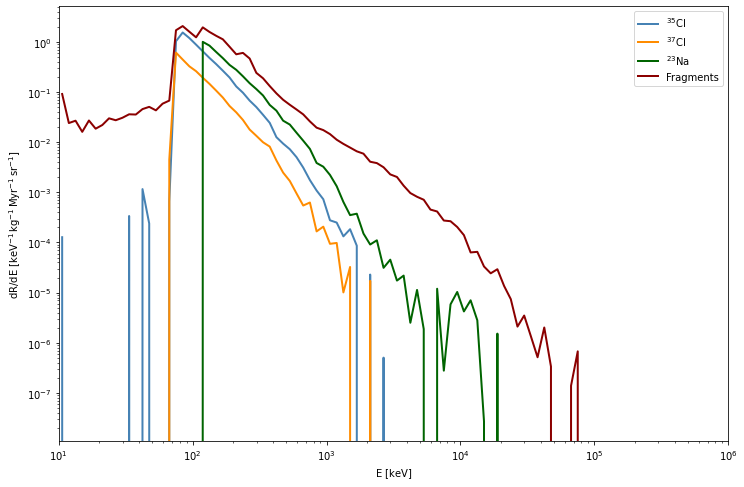

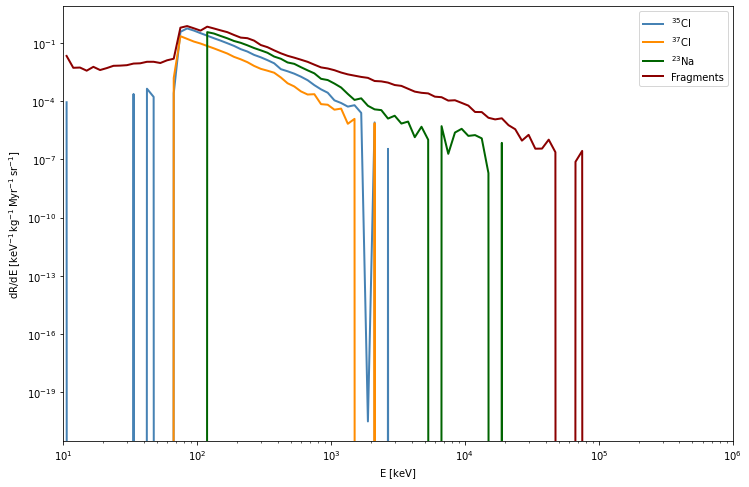

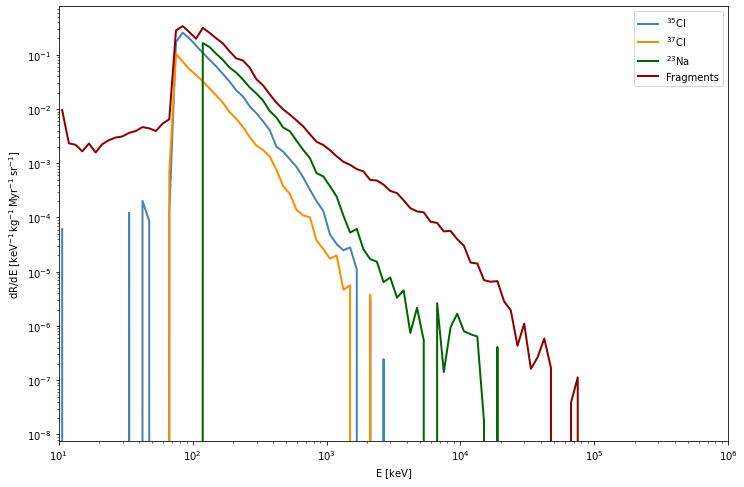

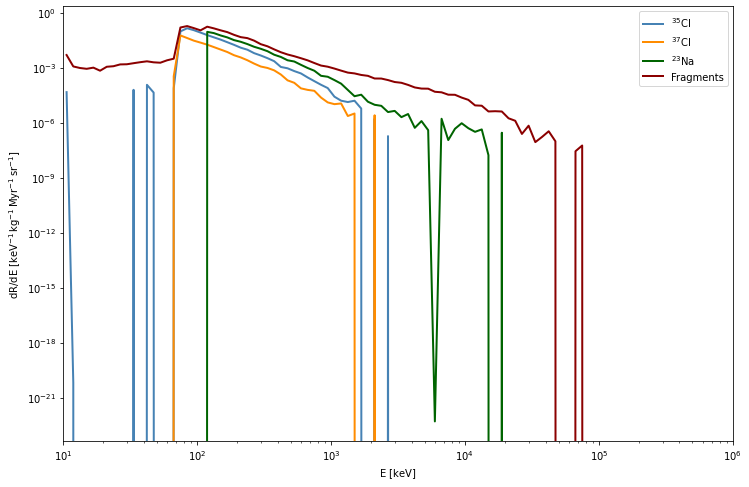

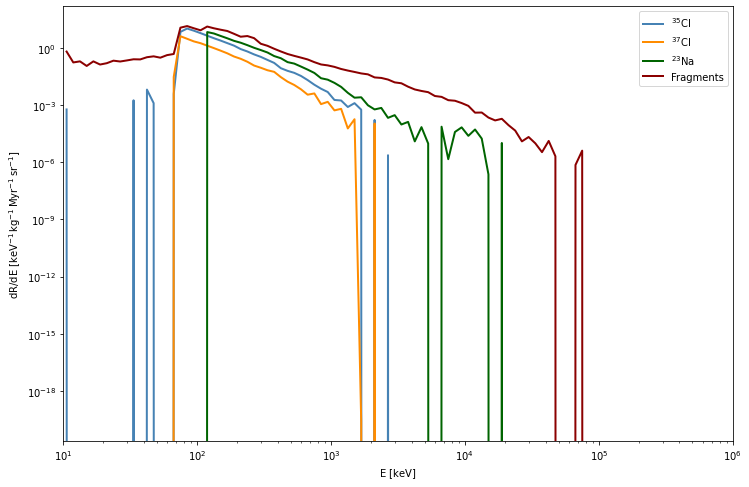

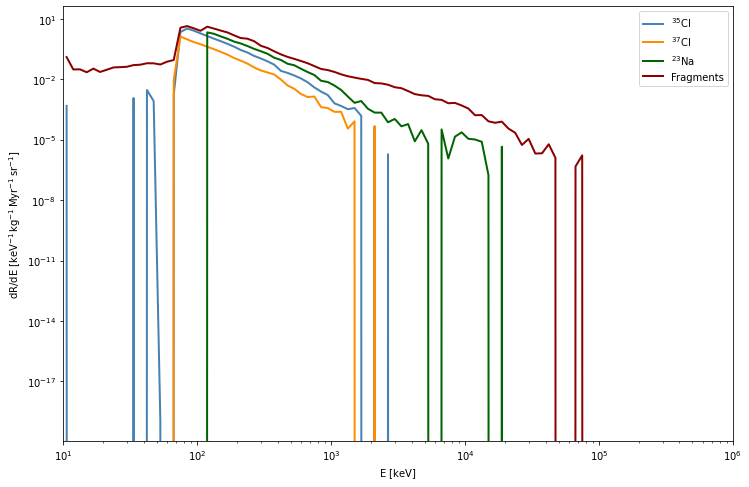

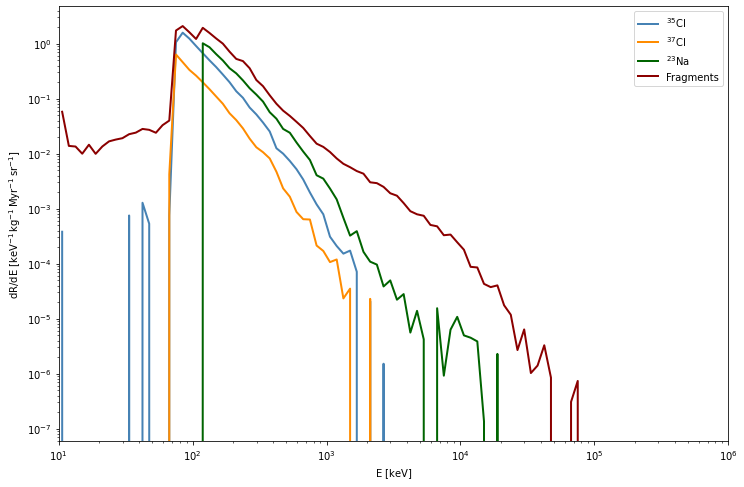

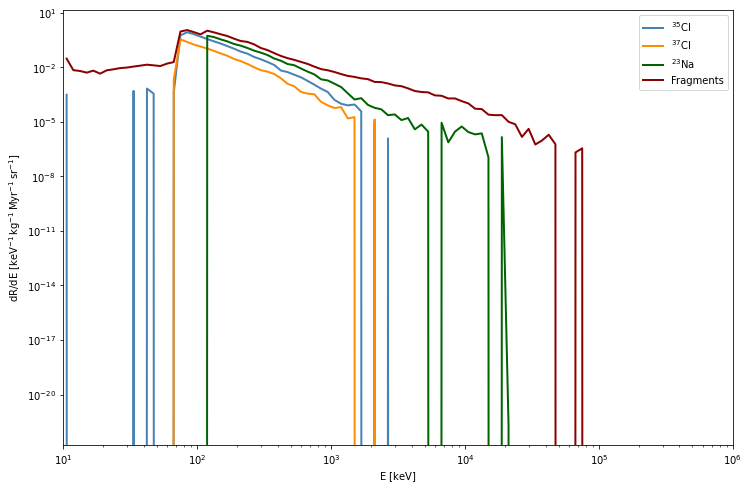

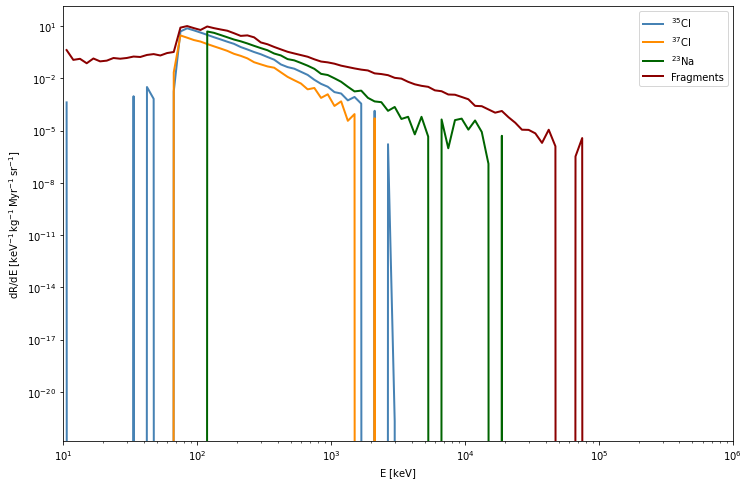

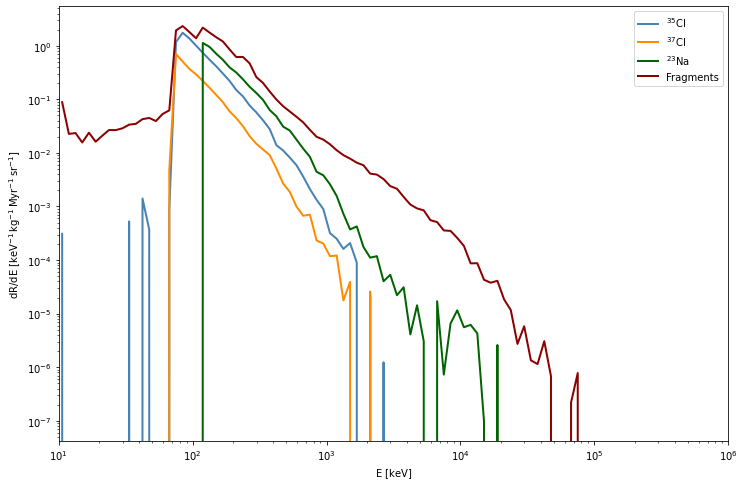

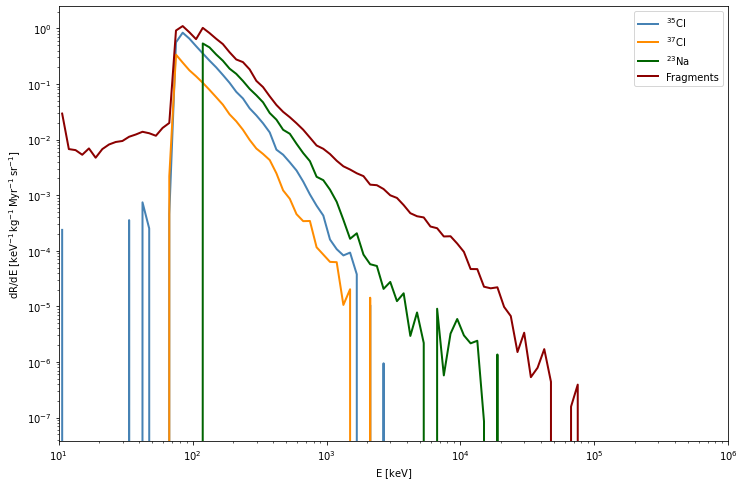

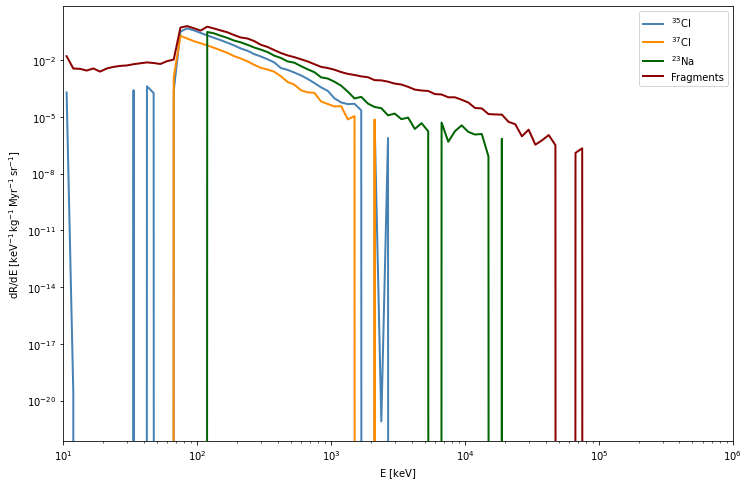

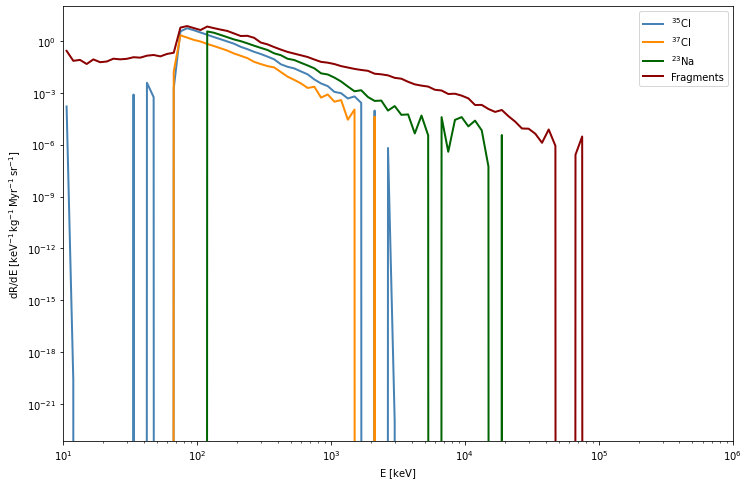

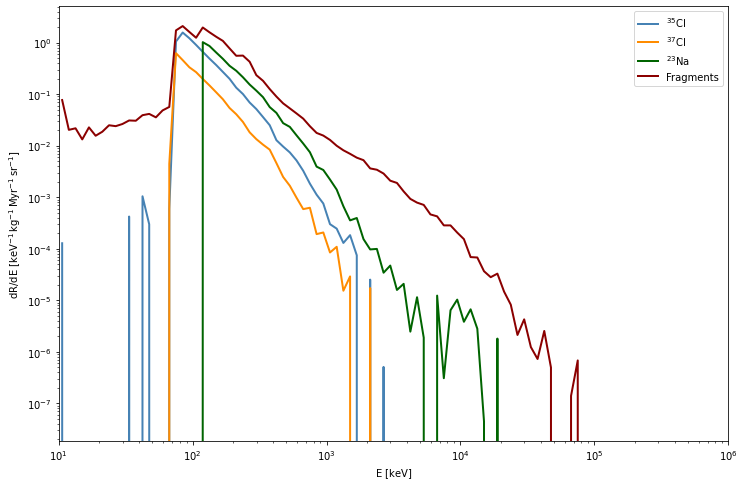

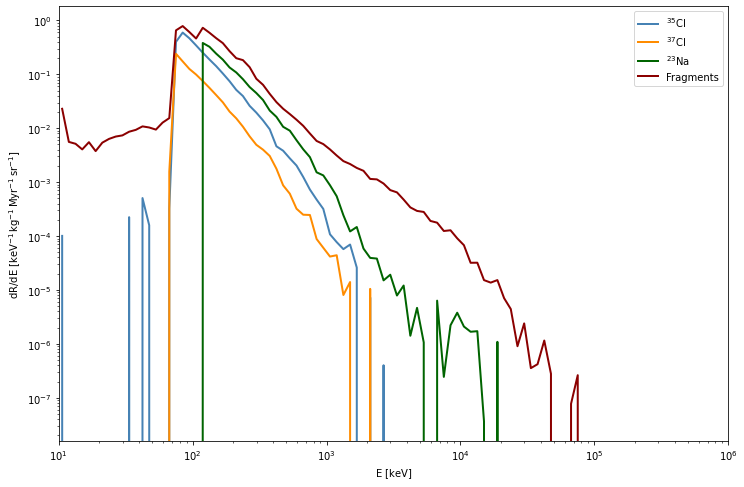

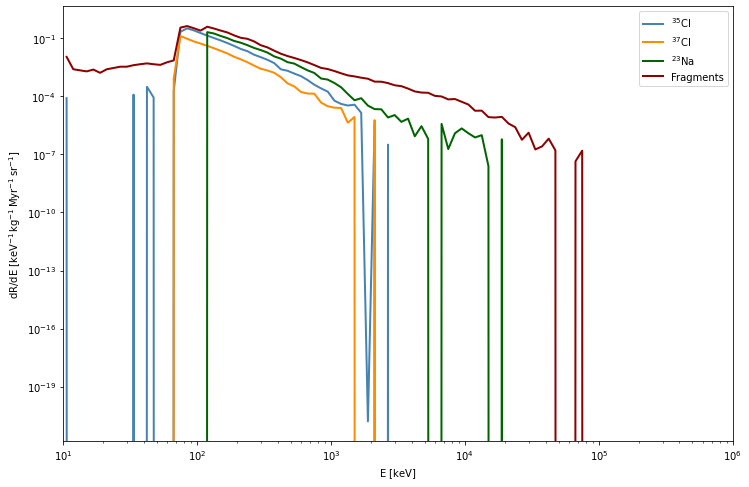

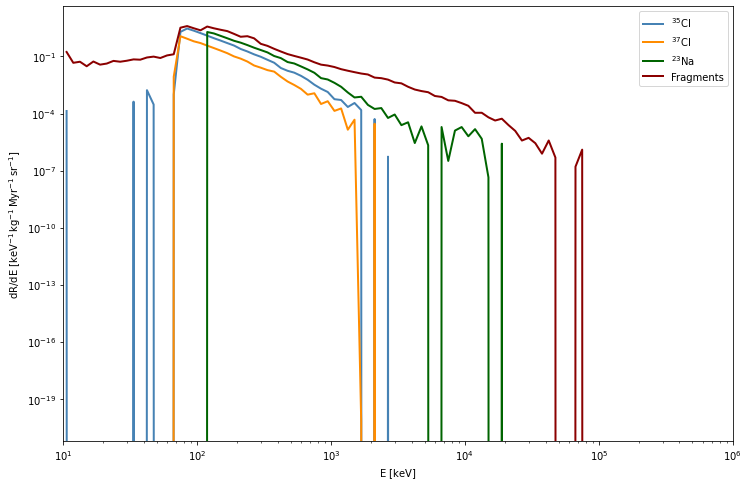

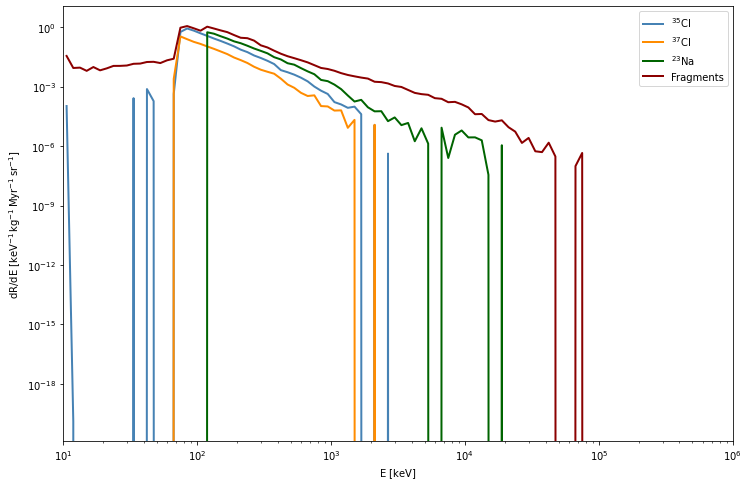

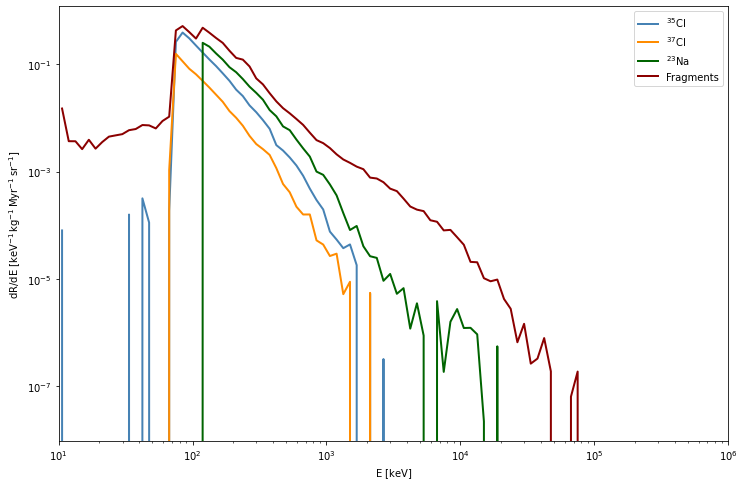

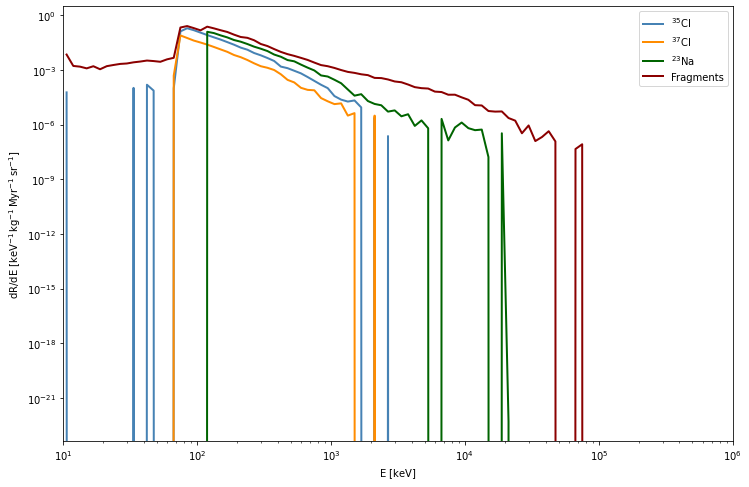

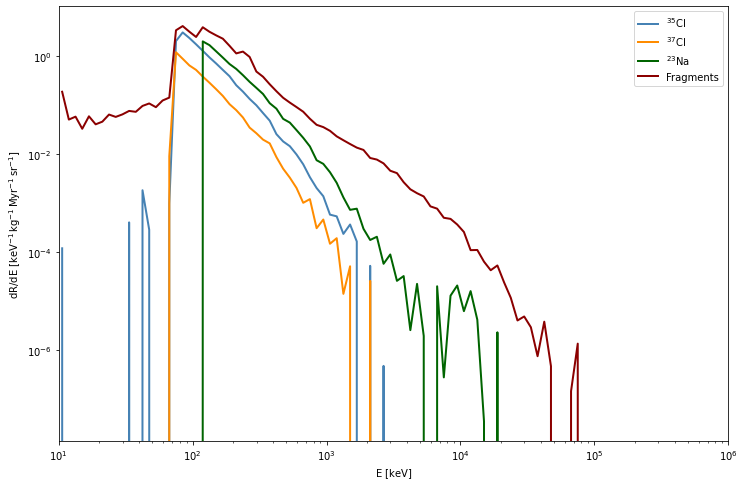

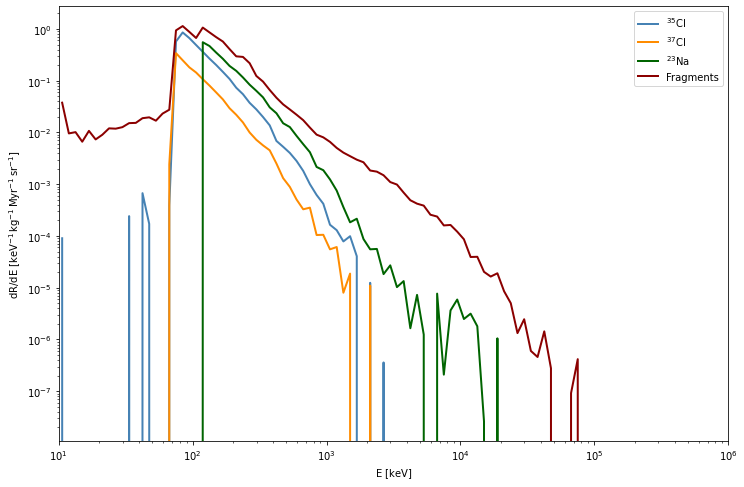

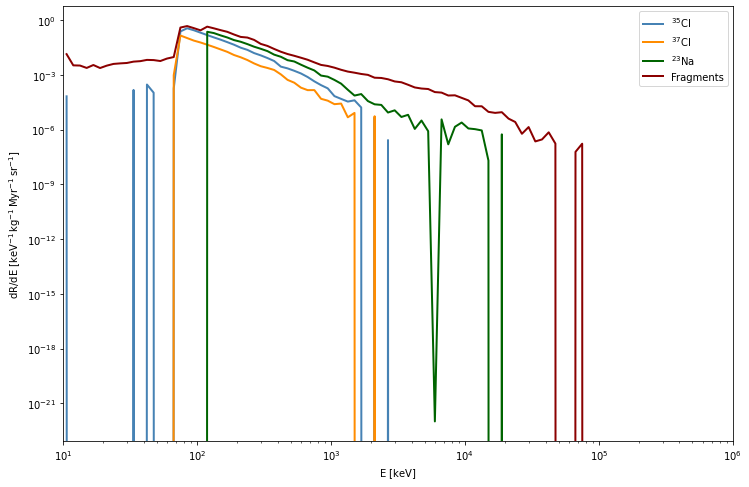

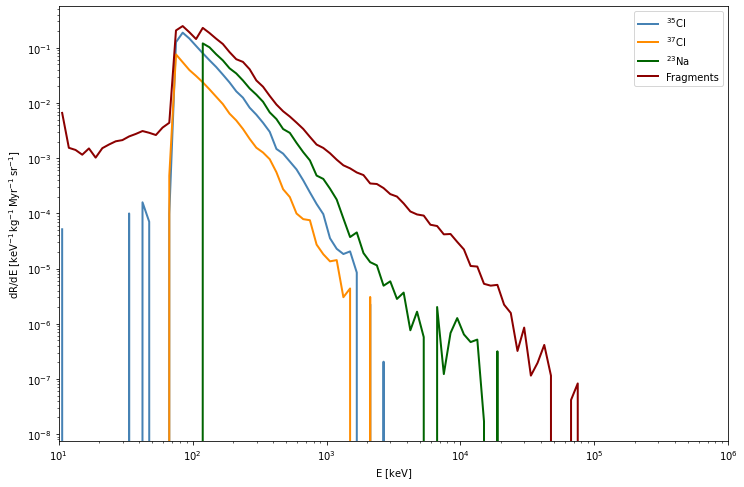

In [8]:
#parametri iniziali
depths = [100, 200, 300, 400]  #profondità dell'alite in metri
depths_kmwe = [d * 2e-3 for d in depths]  #in km.w.e.
Er = np.logspace(-2, 3, 101)  #energia in MeV
time_exposure = 44950 * 365 * 24 * 60 * 60  #tempo di esposizione in secondi (250 Myr)
label_time_fluxes=["100yr", "300yr", "1kyr", "3kyr", "10kyr", "30kyr"] #nome dei file .dat del tempo di durata dei flussi 
time_fluxes = [5e-5, 4.5e-4, 1.35e-3, 3.5e-3, 1.35e-2, 4.5e-2] #intervallo tra un flusso e l'altro in Myr

for i, label in enumerate(label_time_fluxes):
    #carica il flusso iniziale
    x, y = np.loadtxt(f"MuonFluxes/SN20pc{label}.txt", usecols=(0, 1), unpack=True)
    #crea un array di flussi interpolati
    y = y[:-1]/np.diff(x)
    x = x[:-1]
    flux_func = log_interp1d(x, y) #energia in GeV e flusso m-2*s-1*sr-1*Gev-1

    #simula per ciascuna profondità correggendo i flussi
    for depth in depths_kmwe:
        xx = np.logspace(0, 3, 200)  #energia in GeV
        ee = par(depth) * (xx + 510) - 510 #energia data degli elettroni in keV
        yy = flux_func(ee) * par(depth)
        #flusso ridotto per via della profondità
        reduced_flux = log_interp1d(xx, yy)

        #integra e calcola conteggi
        Num = Integration([reduced_flux], [time_fluxes[i]], time_exposure) #array somma delle energie di tutti i flussi, normalizzato al tempo totale
        Conta = Count(Num, Er)

        PlotCount(Er, Conta, f"SN20pc1kyr_{depth * 1e3:.0f}m")  # Nome file con profondità


## Calcolo di $\frac{dE}{dx}$ totale sommando i contribuiti di tutti i nuclei

## $\frac{dR}{dx}$ sommando tutti i i-esimi nuclei, pesati, tramite la chain rule